### ***Contributed By:-***
Divyanshi Bhojak

Tarushi Jat


### **Notebook I: Yelp Data Understanding & Visualization**

****

### **Necessary Libraries Import**

In [ ]:
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#  **Dataset: *YELP* Data**    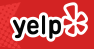

The Yelp dataset is a subset of our businesses, reviews, and user data for use in personal, educational, and academic purposes. 

We are following data files from the YELP data directory:


*   **metadata** file consists attributes like User id, Product id, Rating, Label and Date.

*   **Product IDMapping file**  consists attributes Product name and Product

*   **Review_Content**  consists attributes like Review_id, Product_id, date and Review. 







In [ ]:
metadata = pd.read_csv('/content/drive/MyDrive/Projects/Data/YelpNYC/metadata' , sep = '\t', header = 0)
metadata.columns = ['User_Id', 'Prod_Id', 'Rating', 'Label', 'Date']

review = pd.read_csv("/content/drive/MyDrive/Projects/Data/YelpNYC/reviewContent", sep = '\t', header = 0)
review.columns = ['User_Id', 'Prod_Id', 'Date', 'Review']

ProdIdMap =pd.read_csv("/content/drive/MyDrive/Projects/Data/YelpNYC/productIdMapping", sep = '\t', header = 0)
ProdIdMap.columns = ['Product_Name', 'Prod_Id']

### **Looking at the Files**

First 10 sample of **metadata** files.

In [ ]:
metadata.head(10)

,User_Id,Prod_Id,Rating,Label,Date
0,924,0,3.0,-1,2013-05-16
1,925,0,4.0,-1,2013-07-01
2,926,0,4.0,-1,2011-07-28
3,927,0,4.0,-1,2010-11-01
4,928,0,4.0,-1,2009-09-02
5,929,0,4.0,-1,2009-08-25
6,930,0,4.0,-1,2007-05-20
7,931,0,4.0,-1,2005-12-27
8,932,0,5.0,-1,2014-05-09
9,933,0,5.0,-1,2014-01-21


First 10 sample of **reviewContent** files.

In [ ]:
review.head(10)

,User_Id,Prod_Id,Date,Review
0,924,0,2013-05-16,This little place in Soho is wonderful. I had ...
1,925,0,2013-07-01,ordered lunch for 15 from Snack last Friday. ...
2,926,0,2011-07-28,This is a beautiful quaint little restaurant o...
3,927,0,2010-11-01,Snack is great place for a casual sit down lu...
4,928,0,2009-09-02,A solid 4 stars for this greek food spot. If ...
5,929,0,2009-08-25,Let me start with a shout-out to everyone who ...
6,930,0,2007-05-20,Love this place! Try the Chicken sandwich or ...
7,931,0,2005-12-27,My friend and I were intrigued by the nightly ...
8,932,0,2014-05-09,Stopped in for lunch today and couldn't believ...
9,933,0,2014-01-21,pretty cool place...good food...good people


First 10 sample of **productIDMapping** files.

In [ ]:
ProdIdMap.head(10)

,Product_Name,Prod_Id
0,Peppino’s,1
1,Dekalb Restaurant,3
2,Le Parisien,4
3,Blue Spoon Coffee,5
4,Nai Tapas Bar,6
5,Nook,7
6,Pio Pio Riko,8
7,Hunter’s,9
8,King of Falafel & Shawarma,10
9,Alameda,11


### **Looking at the file Lengths**

In [ ]:
print("Length of metadata file:- ",len(metadata))
print("Length of review file:- ", len(review))
print("Length of ProdIdMap file:- ", len(ProdIdMap))

Length of metadata file:-  359051
Length of review file:-  358956
Length of ProdIdMap file:-  922


### **Users Rating Distribution**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


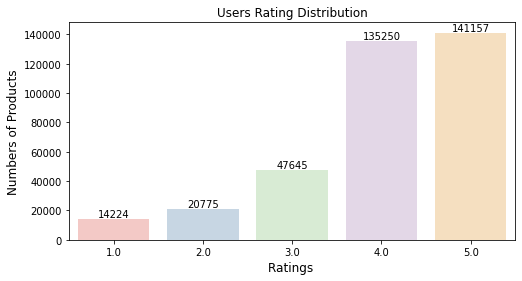

In [ ]:
x=metadata['Rating'].value_counts()
x=x.sort_index()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8,  palette="Pastel1")
plt.title("Users Rating Distribution")
plt.ylabel('Numbers of Products', fontsize=12)
plt.xlabel('Ratings ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

### **Label Count**

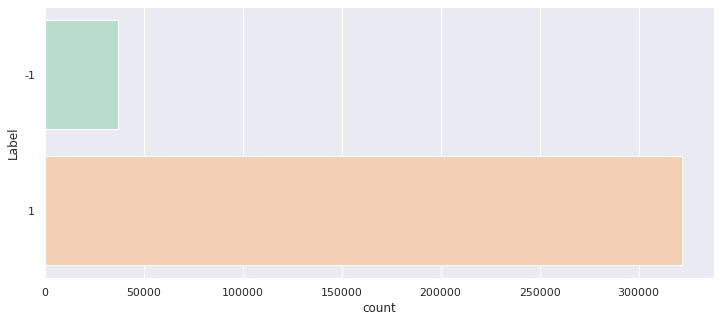

In [ ]:
sns.countplot(y="Label", data = metadata, palette="Pastel2")
sns.set(rc={'figure.figsize':(18,5)})

### **Count of Fake & True Review w.r.t. Rating**

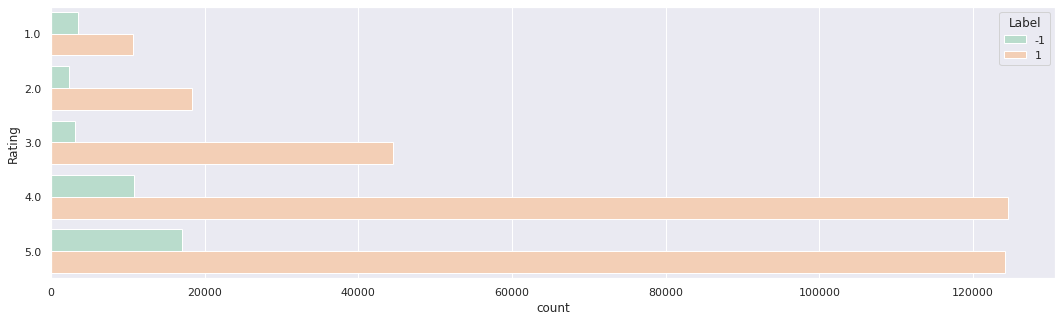

In [ ]:
sns.countplot(y='Rating', data=metadata, hue='Label', palette="Pastel2")
sns.set(rc={'figure.figsize':(18,5)})

### **Word Cloud of Fake Reviews**

In [ ]:
merge = review.merge(metadata, how = 'left', left_on = ['User_Id', 'Prod_Id'], right_on = ['User_Id', 'Prod_Id'])
merged_data = pd.merge(merge, ProdIdMap, on = 'Prod_Id')
merged_data.drop(columns='Date_y', inplace=True)

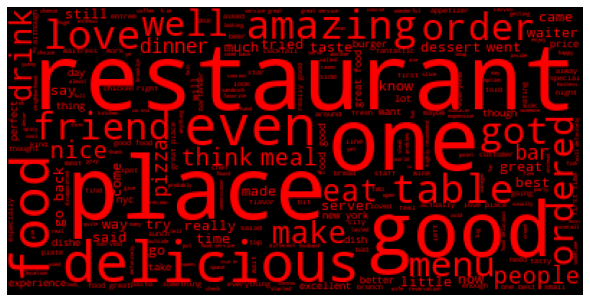

In [ ]:
word_string=" ".join(merged_data[merged_data['Label']==-1]['Review'].str.lower())
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', max_words=300, color_func=(lambda *args, **kwargs: (255,0,0))).generate(word_string)

plt.figure(figsize = (8, 8), facecolor = None)
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

### **Word Cloud of True Reviews**

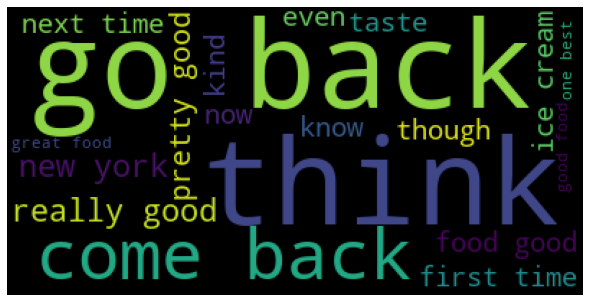

In [ ]:
word_string=" ".join(merged_data[merged_data['Label']==1]['Review'].str.lower())
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', max_words=300, min_font_size = 10).generate(word_string)

plt.figure(figsize = (8, 8), facecolor = None)
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

### **Shading Matrix**

**2-Dimensional** representation of data using the Heatmap of the attributes of the various data files using system of color-coding to represent different values.

Text(0.5, 1.0, 'Heatmap of Attributes')

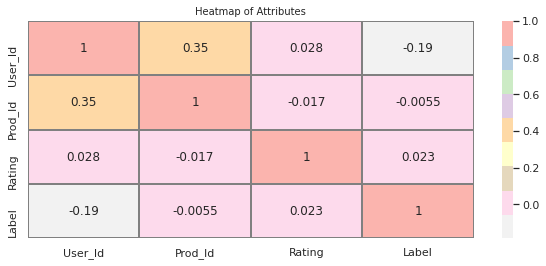

In [ ]:
yelp_cor = review[['Label', 'Rating', 'User_Id', 'Prod_Id']].corr()
fig = plt.figure(figsize=(10,4))
axes = sns.heatmap(yelp_cor, cmap='Pastel2', linewidth=1, linecolor='grey', annot=True)
axes.set_title('Heatmap of Attributes', fontsize=15)

Text(0.5, 1.0, 'Heatmap of Attributes')

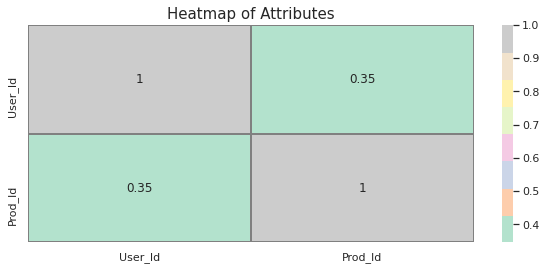

In [ ]:
yelp_cor = review[['User_Id', 'Prod_Id']].corr()
fig = plt.figure(figsize=(10,4))
axes = sns.heatmap(yelp_cor, cmap='Pastel2', linewidth=1, linecolor='grey', annot=True)
axes.set_title('Heatmap of Attributes', fontsize=15)

### **Review Count w.r.t Products**

In [ ]:
output1 = pd.merge(review, ProdIdMap, on='Prod_Id', how='inner')

In [ ]:
output1.dropna()

,User_Id,Prod_Id,Date,Review,Product_Name
0,1133,1,2013-12-21,My wife and I took my parents there for lunch ...,Peppino’s
1,1134,1,2013-11-25,Got a margarita pizza. First off let me say ve...,Peppino’s
2,1135,1,2014-07-24,The food is average pizzeria and not cheap. A...,Peppino’s
3,1136,1,2014-03-05,I can not fathom why people would give this re...,Peppino’s
4,1137,1,2014-11-21,Went here during the time it was busy and i go...,Peppino’s
...,...,...,...,...,...
358742,161146,349,2014-02-06,"I'm very spoiled with Pizza. Really, I have tr...",Emily
358743,116424,349,2014-01-31,Can't say enough good things about this place....,Emily
358744,161147,349,2014-01-30,"Had a great dinner here- fantastic pizza, the ...",Emily
358745,97930,349,2014-01-25,"Great foods and great drinks, they have even p...",Emily


In [ ]:
x=output1['Prod_Id'].value_counts()
x=x.sort_index()

In [ ]:
plotdata = pd.DataFrame({"Prod_Id":x.index, 'Review_Count':x.values})
plotdata.head(10)

,Prod_Id,Review_Count
0,1,253
1,2,166
2,3,59
3,4,547
4,5,86
5,6,508
6,7,677
7,8,162
8,9,178
9,10,498


In [ ]:
plotdata.to_csv('plotdata.csv')
!cp plotdata.csv "drive/My Drive/"

In [ ]:
tr = pd.read_csv('/content/drive/MyDrive/IT750/plotdata.csv', nrows=100)

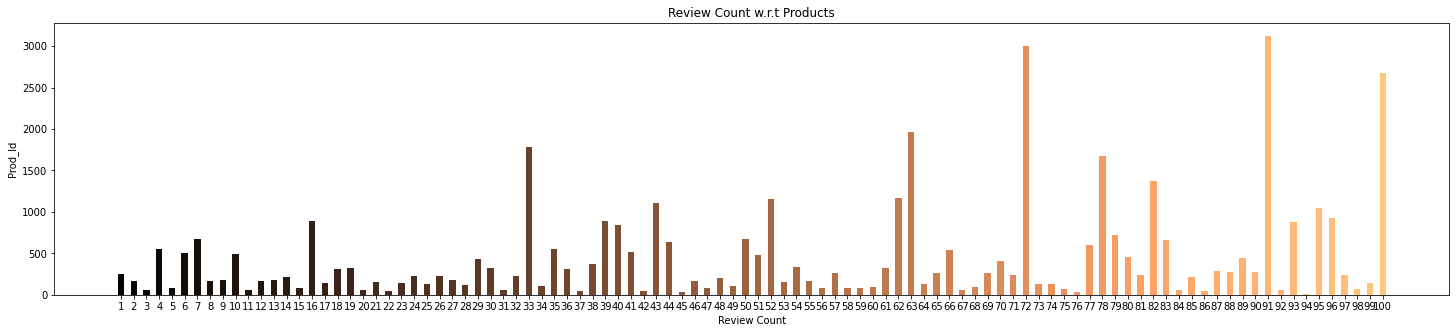

In [ ]:
plt.figure(figsize=(25,5))
plt.bar(tr['Prod_Id'], tr['Review_Count'], width=0.5, color=sns.color_palette("copper", n_colors=len(tr['Prod_Id'])))
plt.xticks(tr['Prod_Id'])

plt.ylabel("Prod_Id")
plt.xlabel("Review Count")
plt.title("Review Count w.r.t Products")
plt.show()

**End of Data Visualization**